# Importing necessary libraries

We will import the libraries required to create the ml model later

In [563]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Loading the "Titanic" train and test files
By default, the training set is the "train.csv" and the test set is "test.csv"
We need to submit the predictions on the test set to the Kaggle platform

[Check the problem here](https://www.kaggle.com/c/titanic/data)

Alexis Cook's Random Forest approach: [Click Here](https://www.kaggle.com/alexisbcook/titanic-tutorial)

In [564]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('Data/test.csv')

In [565]:
display(train.head())
display(test.head())
display(train.columns)
display(train.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

# Visualizing the dataset "train.csv" for EDA
We will use the Seaborn's heatmap tool to visualize null values in the dataset
As wee can see around 20 percent of "Age" column has null values
and 77 percent of values of "Cabin" is null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Percentage of values null in age:  19.865319865319865
Percentage of values null in cabin:  77.10437710437711


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


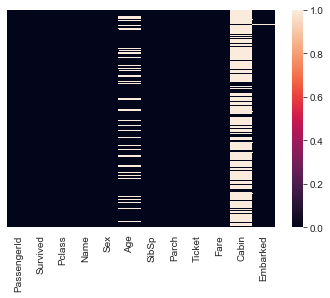

In [566]:
display(train.isnull())

"Visualizing the null values using heatmap"
sns.heatmap(train.isnull(),yticklabels=False)

print("Percentage of values null in age: ", 100 * train[train['Age'].isnull()].shape[0] / train.shape[0])
print("Percentage of values null in cabin: ", 100 * train[train['Cabin'].isnull()].shape[0] / train.shape[0])
display(train[train.Embarked.isnull()])

# Counting the survived ones with respect to Sex, Passenger Class
Here we have used Seaborn's sns.countplot() function

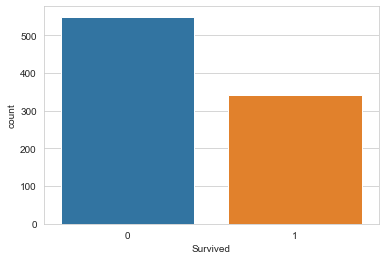

In [567]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

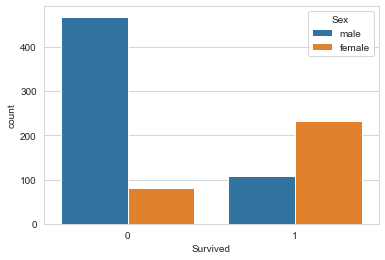

In [568]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

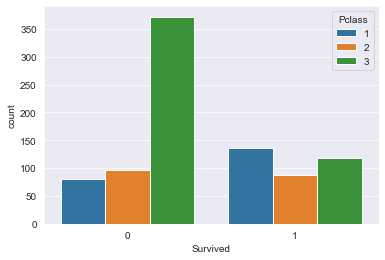

In [569]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

# Visualizing the distribution of the Age of passengers

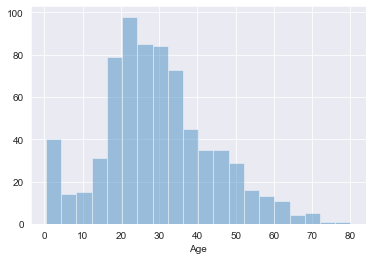

In [570]:
sns.distplot(train['Age'].dropna(),kde=False,bins=20)

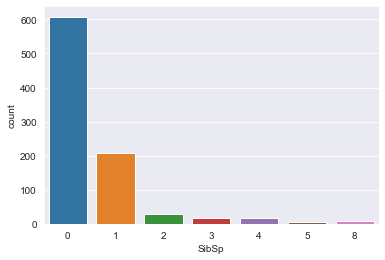

In [571]:
sns.countplot(x='SibSp', data=train)

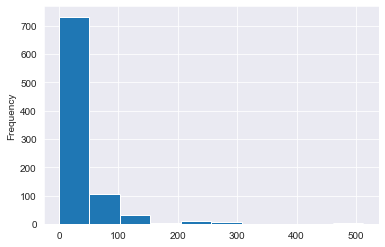

In [572]:
train['Fare'].plot(kind='hist',bins=10)

# Using boxplot to find the median of Age for different classes
Inspecting the median of the age of passengers for every passenger class we can fill the null values for age column 
We are using Seaborn's boxplot function
We can see for class = 1 median of age is around 37

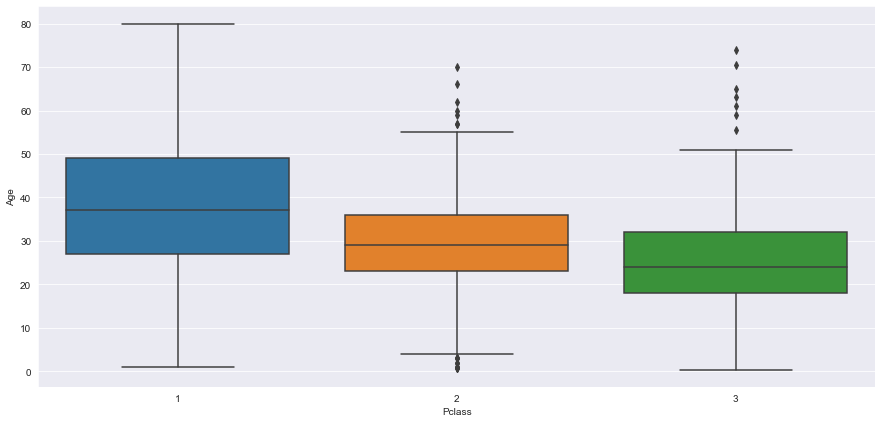

In [573]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Pclass',y='Age', data=train)

# Boxplot for Embarked column values
To figure out what can be filled to the null values of Embarked column we can use the same method as Age
After filling the Age values we can deal with the Embarked value in the trainning set

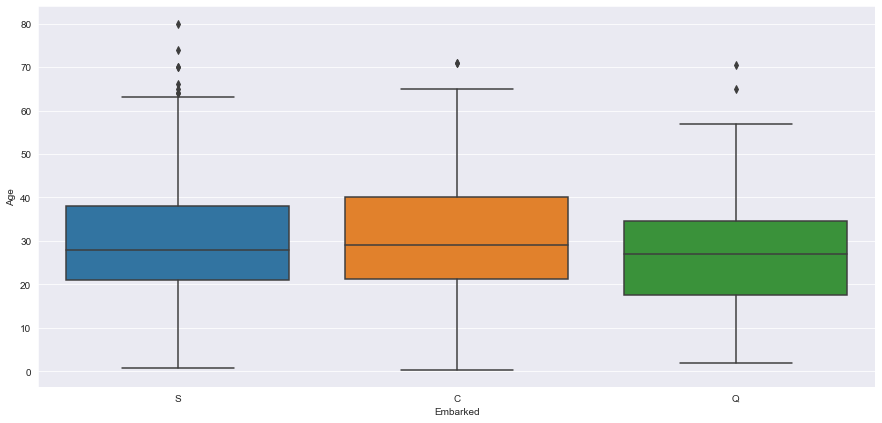

In [574]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Embarked', y='Age', data=train)

# Function to change the Age values
The below function will take one row each time and sets the null values(if exists) and replace them with the median of age that was inspected by the box plot

In [575]:
def correct_age(row):
    """Function to set the age of NaN values to the average
       with respect to the passenger class they belong to 
    """
    ref = {'1': 37, '2': 29, '3': 24}
    
    if row.isnull()['Age']:
        return ref[str(row['Pclass'])]
    else:
        return row['Age']

## Here is an example how we can use the "correct_age()" method to replace NaN values

In [576]:
dict_one = {'id': [1, 2, 3], 'name': ['raja', 'polo', 'kartik'], 'Age': [18, None, None], 'Pclass': [1, 2, 1]}
print(dict_one)
df_dict = pd.DataFrame(dict_one)
display(df_dict)

df_dict['Age'] = df_dict.apply(correct_age, axis=1)

display(df_dict.isnull())
display(df_dict)

{'id': [1, 2, 3], 'name': ['raja', 'polo', 'kartik'], 'Age': [18, None, None], 'Pclass': [1, 2, 1]}


,id,name,Age,Pclass
0,1,raja,18.0,1
1,2,polo,NaN,2
2,3,kartik,NaN,1


,id,name,Age,Pclass
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False


,id,name,Age,Pclass
0,1,raja,18.0,1
1,2,polo,29.0,2
2,3,kartik,37.0,1


# Function to correct the null values of "Embarked" column in a similar way

In [577]:
def correct_embark(row):
    """Function to fix embarked value"""
    if row.isnull()['Embarked']:
        if row['Age'] < 40:
            return 'Q'
        elif row['Age'] > 60:
            return 'S'
        else:
            return 'C'
    else:
        return row['Embarked']

# Defining all the data cleaning steps in one function
## The steps involves:
1. Fix the NaN values of column "Age"
2. Fix the NaN values of column "Embarked"
3. Encoding the "Sex" and "Embarked" column in categories(As Sex = {"male", "female"} and Embarked = {"Q", "S", "C"}) are categorical values
4. Droping the column which can not be used in the trainning step
5. Concatinating the new train, Sex, and Embark dataframes
6. Visualizing to make sure train data has no null values by heatmap()
7. returning the changed dataframe

In [578]:
def transform_data(train):
    train['Age'] = train.apply(correct_age, axis = 1)
    train['Embarked'] = train.apply(correct_embark, axis=1)
    print("DataFrame after correction of Age and Embarked")
    display(train.head())
    
    Sex = pd.get_dummies(train['Sex'], drop_first = True)
    Embark = pd.get_dummies(train['Embarked'], drop_first = True)
    train.drop(['Name', 'Sex', 'Ticket', 'Embarked', 'Cabin'], axis=1, inplace=True)
    train = pd.concat([train, Sex, Embark], axis=1)
    print("Data to be used: ")
    display(train.head())
    sns.heatmap(train.isnull(), yticklabels=False)
    return train

### As we can see the final train data has only neumaric values for hte trainning(Because  sklearn's linear_model only takes neumeric values)

DataFrame after correction of Age and Embarked


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data to be used: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


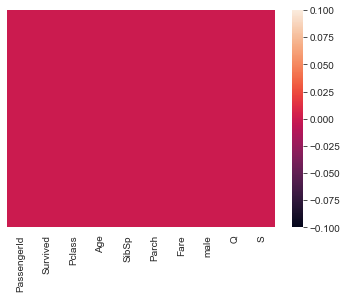

In [579]:
train = transform_data(train)

In [580]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [581]:
train.shape

(891, 10)

# Importing required libraries from SciKit Learn
1. We will use a LogisticRegression model(Although more complex model can be used to understand more complex pattern
2. train_test_split function will generate train data, target data for both model trainning and testing(not the final testing)
3. confusion_matrix will calculate the different scores of the model

In [582]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [583]:
train_X, test_X, train_y, test_y = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.15, random_state=10)

### Trainning the model

In [584]:
logreg = LogisticRegression(C = 1.0, max_iter=100)
logreg.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [593]:
print(logreg.score(test_X, test_y))

0.8432835820895522


### Getting an accuracy around 85 percent

In [586]:
pred = logreg.predict(test_X)
acc = confusion_matrix(pred, test_y)
display(acc)

array([[75, 14],
       [ 7, 38]], dtype=int64)

# Transforming the test set(given by Kaggle) for evaluation 


DataFrame after correction of Age and Embarked


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data to be used: 


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


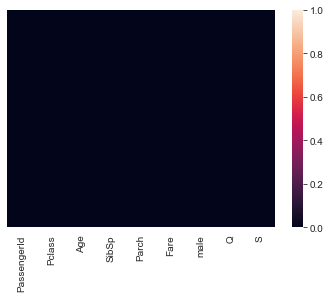

In [587]:
test = transform_data(test)

# We actually found that there is however a missing data in 'Fare' column
But we can easily fill this as Fare is dependent on the passenger class
We can boxplot it and find what value might be perfect

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
152,1044,3,60.5,0,0,NaN,1,0,1


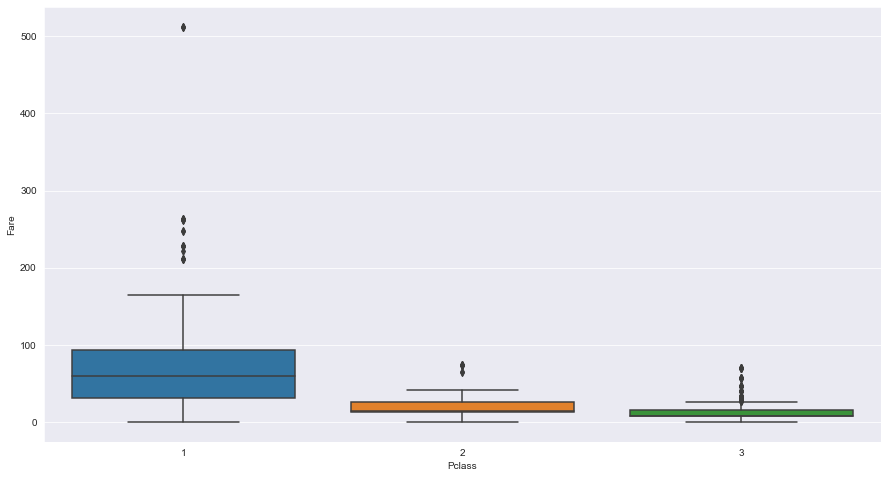

In [588]:
display(test.head())
display(test[test['Fare'].isnull()])

plt.figure(figsize = (15, 8))
sns.boxplot(x='Pclass', y='Fare', data=train)

In [589]:
mean = np.mean(train[train['Pclass'] == 3]['Fare'])
print(mean)

13.675550101832997


In [590]:
test.Fare.fillna(mean, inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   male         418 non-null    uint8  
 7   Q            418 non-null    uint8  
 8   S            418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


### Now the test set has all non-null values, so we can proceed to predict

In [591]:
predictions = logreg.predict(test)

# Saving the score
We have the predictions
Now following the submission format of Kaggle we have created this dictionary
We are saving the dictionary in ".csv" format

In [592]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
